In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import chardet
import os
from collections import Counter

2024-08-09 04:32:46.882393: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-09 04:32:46.882900: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-09 04:32:46.885194: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-09 04:32:46.891180: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 04:32:46.901906: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:


# 데이터셋 경로
file_path = '/home/jys0714/바탕화면/-/datasets/McDonald_s_Reviews.csv'

# 파일 인코딩 확인 및 데이터 로드

df = pd.read_csv(file_path, encoding='latin1')


# # 데이터셋의 첫 몇 행 출력
# print(df.head())

# # 데이터셋 정보 출력
# print(df.info())

# # 리뷰 컬럼의 샘플 데이터 출력
# print(df['review'].sample(10))
df


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


In [3]:
df.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [4]:
df.shape

(33396, 10)

In [5]:
df = df.dropna()
print(df.shape)

(32736, 10)


In [6]:
df.isnull().sum()

reviewer_id      0
store_name       0
category         0
store_address    0
latitude         0
longitude        0
rating_count     0
review_time      0
review           0
rating           0
dtype: int64

In [7]:
import matplotlib.pyplot as plt

def barplot(colunm_name):
    plt.bar(df[colunm_name].value_counts().index, df[colunm_name].value_counts().values)
    plt.show()

In [8]:
df['rating'].value_counts()

rating
5 stars    10059
1 star      9305
4 stars     5646
3 stars     4706
2 stars     3020
Name: count, dtype: int64

In [9]:
len(df['store_address'].value_counts())

39

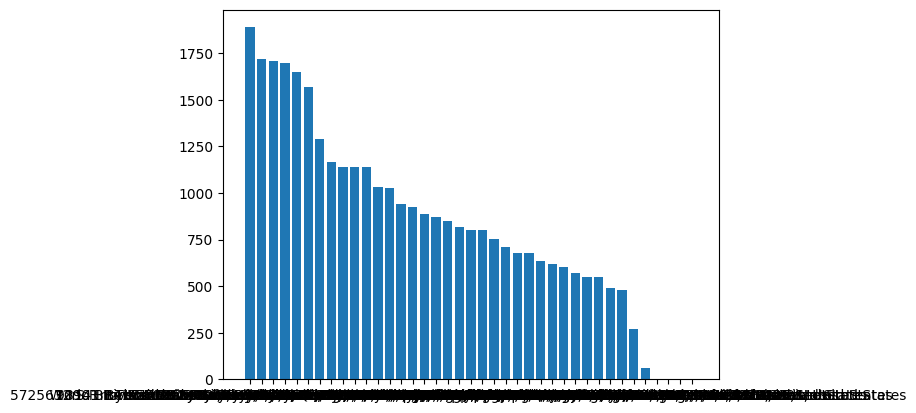

In [10]:
barplot('store_address')

In [11]:
df['store_address'].value_counts()

store_address
9814 International Dr, Orlando, FL 32819, United States                       1890
5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States          1720
10901 Riverside Dr, North Hollywood, CA 91602, United States                  1710
1415 E State Rd, Fern Park, FL 32730, United States                           1700
632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States        1650
3501 Biscayne Blvd, Miami, FL 33137, United States                            1570
621 Broadway, Newark, NJ 07104, United States                                 1290
1100 N US Hwy 377, Roanoke, TX 76262, United States                           1168
72-69 Kissena Blvd, Queens, NY 11367, United States                           1140
429 7th Ave, New York, NY 10001, United States                                1140
724 Broadway, New York, NY 10003, United States                               1140
By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United State

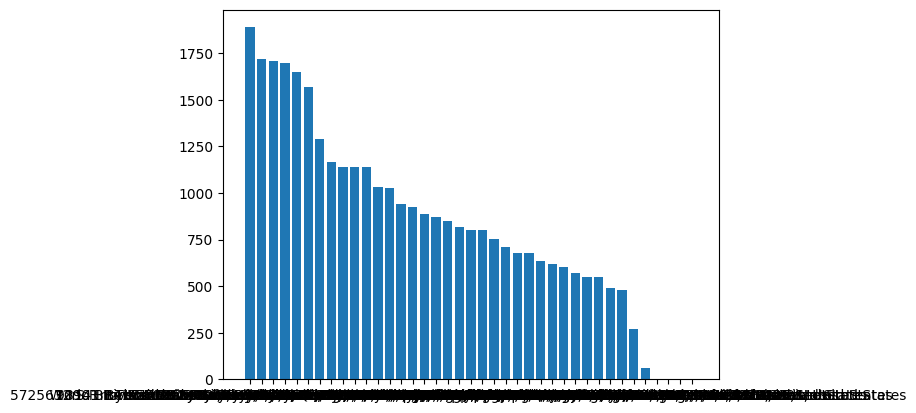

In [12]:
barplot('store_address')

In [13]:
df['longitude'].value_counts()


longitude
-81.461242     1890
-81.513738     1720
-118.367904    1710
-81.342692     1700
-96.812286     1650
-80.189098     1570
-74.161475     1290
-97.222925     1168
-73.812460     1140
-73.990583     1140
-73.993264     1140
-115.175822    1030
-75.399919     1028
-74.981099      943
-97.660629      926
-111.897383     890
-73.992876      870
-97.307652      850
-118.494540     820
-97.792874      800
-121.995421     800
-87.777913      751
-81.405103      710
-77.044235      680
-117.249470     680
-98.634580      635
-73.459820      620
-77.185055      602
-80.132077      570
-118.238206     550
-117.178011     550
-81.471414      490
-118.282955     481
-74.001168      270
-73.989096       60
-73.988280        3
-118.426000       3
-77.028913        3
-74.009979        3
Name: count, dtype: int64

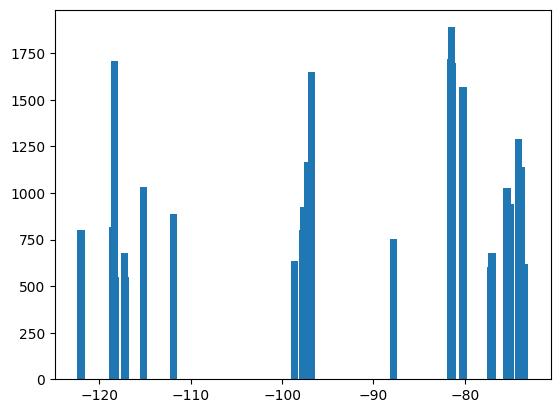

In [14]:
barplot('longitude')

In [15]:
print(len(df['longitude'].value_counts()))

39


In [16]:
df['latitude '].value_counts()


latitude 
28.423814    1890
28.333508    1720
34.152507    1710
28.655350    1700
32.744596    1650
25.810000    1570
40.771910    1290
33.009318    1168
40.727401    1140
40.750506    1140
40.729126    1140
36.090244    1030
40.922081    1028
39.852059     943
30.329135     926
40.759057     890
40.752529     870
32.958041     850
34.012219     820
30.460718     800
37.385495     800
41.879656     751
28.399986     710
38.905456     680
32.797661     680
29.676267     635
44.981410     620
38.812823     602
25.790295     570
34.035270     550
32.820654     550
28.450387     490
33.931261     481
40.718514     270
40.750831      60
40.718838       3
34.056593       3
38.896980       3
40.709375       3
Name: count, dtype: int64

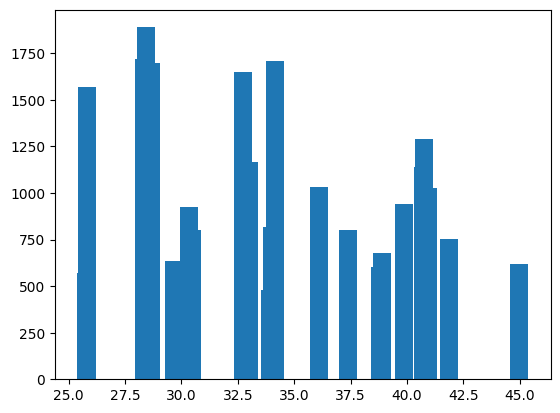

In [17]:
barplot('latitude ')

In [18]:
print(len(df['latitude '].value_counts()))

39


In [19]:
df['review_time'].value_counts()

review_time
4 years ago      6633
3 years ago      5425
a year ago       4698
5 years ago      4225
2 years ago      3850
6 years ago      1644
2 months ago      610
8 months ago      487
10 months ago     482
3 months ago      479
a month ago       472
7 months ago      459
5 months ago      448
11 months ago     446
6 months ago      444
9 months ago      435
4 months ago      380
7 years ago       374
2 weeks ago       131
a week ago        125
3 weeks ago       118
8 years ago        84
9 years ago        52
4 weeks ago        46
10 years ago       37
2 days ago         30
4 days ago         25
5 days ago         22
3 days ago         21
6 days ago         17
a day ago          16
11 years ago       10
12 years ago        4
21 hours ago        2
23 hours ago        1
6 hours ago         1
20 hours ago        1
22 hours ago        1
8 hours ago         1
Name: count, dtype: int64

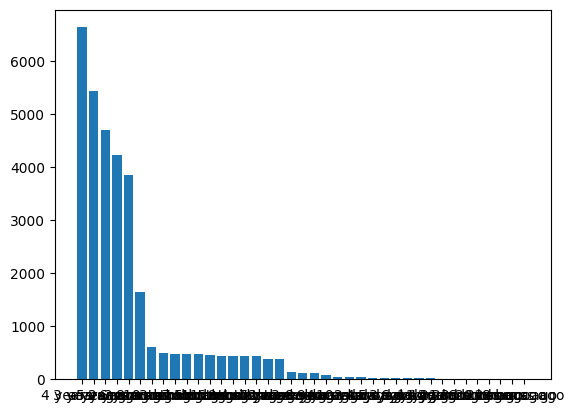

In [20]:
barplot('review_time')

In [21]:
print(len(df['review_time'].value_counts()))

39


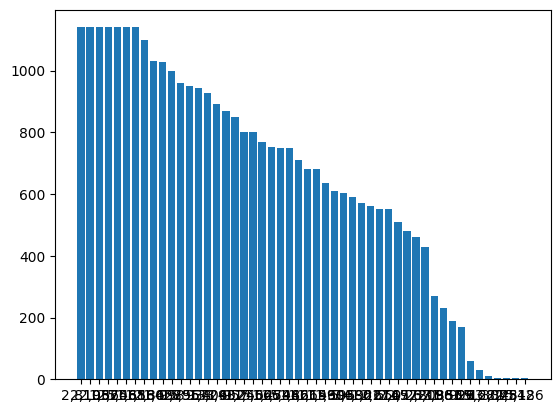

In [22]:
barplot('rating_count')

In [23]:
df['rating_count'].value_counts()

rating_count
2,810     1140
2,193     1140
2,052     1140
1,670     1140
2,658     1140
5,468     1140
1,618     1140
1,564     1100
2,365     1030
1,028     1028
998        998
1,795      960
5,567      950
933        943
1,406      926
3,243      890
3,902      870
957        850
1,240      800
1,562      800
5,566      770
1,454      751
1,794      750
5,466      750
1,861      710
1,269      680
1,159      680
1,460      635
1,306      610
595        602
3,380      590
4,922      570
1,617      560
2,614      550
550        550
2,657      510
2,722      481
19,671     460
2,808      430
3,196      270
3,381      230
1,565      190
999        170
263         60
19,682      30
1,307       10
2,348        3
2,251        3
1,542        3
5,186        3
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

df['rating'] = df['rating'].astype(str).str[0].astype(int)
df['rating']

/tmp/ipykernel_291269/3970920434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(str).str[0].astype(int)


0        1
1        4
2        1
3        5
4        1
        ..
33391    1
33392    5
33393    4
33394    5
33395    5
Name: rating, Length: 32736, dtype: int64

In [25]:
target = df.pop('rating')

In [26]:
target.value_counts()
print(target.isnull().sum())

0


In [27]:
# df[['store_address', 'latitude ', 'longitude', 'rating_count', 'review_time']]
df_X = df[['store_address', 'latitude ', 'longitude', 'rating_count', 'review_time']]
print(df_X.shape, target.shape)
df_X = pd.concat([df_X, target], axis=1)

df_X 

(32736, 5) (32736,)


,store_address,latitude,longitude,rating_count,review_time,rating
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,1
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,4
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,1
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,5
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,1
...,...,...,...,...,...,...
33391,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,1
33392,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,5
33393,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,4
33394,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,5


In [28]:
import seaborn as sns

label_encoders = {}

for column in df_X.columns:
    if df_X[column].dtype == 'object':
        le = LabelEncoder()
        df_X[column] = le.fit_transform(df_X[column])
        label_encoders[column] = le


# 상관관계 계산
correlation_matrix = df_X.corr()

# 상관관계 출력
print(correlation_matrix)


               store_address  latitude   longitude  rating_count  review_time  \
store_address       1.000000   0.025903   0.215798      0.280736     0.015802   
latitude            0.025903   1.000000   0.144969     -0.256145    -0.016450   
longitude           0.215798   0.144969   1.000000      0.018897     0.021053   
rating_count        0.280736  -0.256145   0.018897      1.000000     0.001985   
review_time         0.015802  -0.016450   0.021053      0.001985     1.000000   
rating             -0.051795   0.103421   0.017439     -0.050706    -0.029029   

                 rating  
store_address -0.051795  
latitude       0.103421  
longitude      0.017439  
rating_count  -0.050706  
review_time   -0.029029  
rating         1.000000  


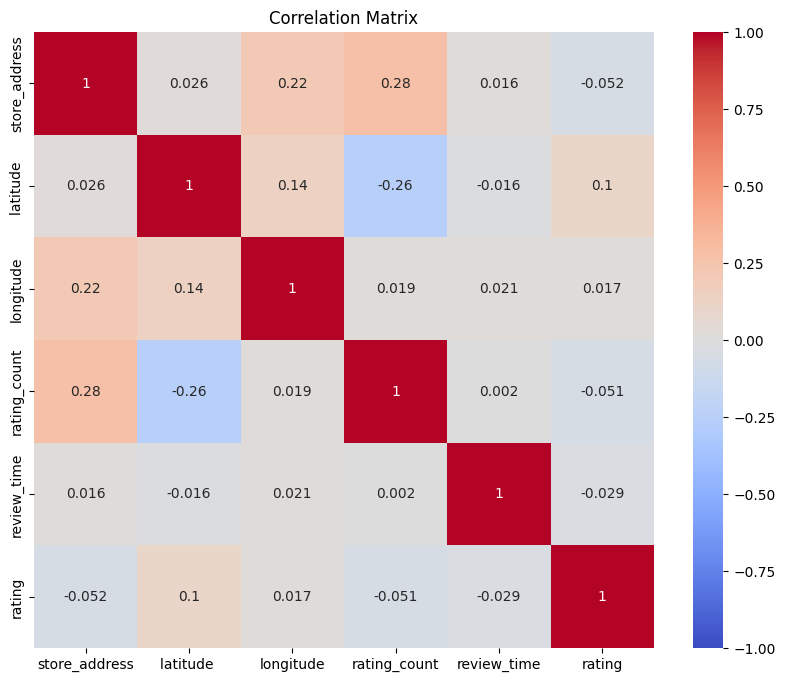

In [29]:
# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [30]:
df_X.pop('rating')

0        1
1        4
2        1
3        5
4        1
        ..
33391    1
33392    5
33393    4
33394    5
33395    5
Name: rating, Length: 32736, dtype: int64

In [31]:
df_X

,store_address,latitude,longitude,rating_count,review_time
0,8,30.460718,-97.792874,2,14
1,8,30.460718,-97.792874,2,21
2,8,30.460718,-97.792874,2,21
3,8,30.460718,-97.792874,2,36
4,8,30.460718,-97.792874,2,6
...,...,...,...,...,...
33391,20,25.810000,-80.189098,31,20
33392,20,25.810000,-80.189098,31,38
33393,20,25.810000,-80.189098,31,38
33394,20,25.810000,-80.189098,31,23


In [32]:
df_X.columns

Index(['store_address', 'latitude ', 'longitude', 'rating_count',
       'review_time'],
      dtype='object')

In [33]:
X_one_hot_encoded = pd.get_dummies(df_X, columns=['store_address', 'latitude ', 'longitude', 'rating_count', 'review_time'])
# X_one_hot_encoded = pd.get_dummies[columns = col_list]

In [34]:
X_one_hot_encoded.shape

(32736, 206)

In [35]:

ds_raw = tf.data.Dataset.from_tensor_slices((df['review'], target.values))

# 데이터셋 확인
for ex in ds_raw.take(3):
    tf.print(ex[0].numpy().decode('utf-8')[:50], ex[1])

Why does it look like someone spit on my food?
I h 1
It'd McDonalds. It is what it is as far as the foo 4
Made a mobile order got to the speaker and checked 1


I0000 00:00:1723145569.555599  291269 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-09 04:32:49.555818: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-08-09 04:32:49.589744: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
df.shape

(32736, 9)

In [39]:
import myprocess

datasize = df.shape[0]
preprocessor = myprocess.PreProcess(ds_raw, datasize)

In [40]:
batch_size = 10

train_data, valid_data, test_data = preprocessor.get_datas(batch_size, train_size=0.4, valid_size = 0.1, test_size=0.5)
token_counts = preprocessor.token_counts
token_counts

TypeError: Expected binary or unicode string, got 87